In [1]:
import numpy as np
import random 
import matplotlib.pyplot as plt

In [2]:
point = [(0, 0), (1, 0), (0, 1), (1, 1), (2, 1), (1, 2), (2, 2), (3, 2), (6, 6), (7, 6), (8, 6), (7, 7), (8, 7),
         (9, 7), (7, 8), (8, 8), (9, 8), (8, 9), (9, 9)]
#print(point)
point = np.array(point)
#print(point)

In [3]:
def draw_scatter(point = None, color = 'ro'):
    x_value = [x[0] for x in point]
    y_value = [x[1] for x in point]
    #print(x_value)
    plt.plot(x_value,y_value, color)
    plt.xlim(-1, 10)
    plt.ylim(-1, 10)
    plt.show()

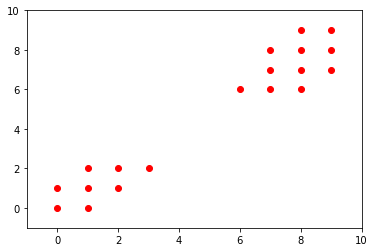

In [4]:
draw_scatter(point)

In [5]:
def shortest_distance_num(point, center):
    dist = np.linalg.norm(np.array(point) - np.array(center[0]))
    num = 0
    i = 0
    for cen_ in center:
        #print('#')
        #print(cen_)
        #print(i)
        dist_t = np.linalg.norm(cen_ - np.array(point))
        if dist_t < dist:
            dist = dist_t
            num = i
        i = i + 1
    #print(num)
    return num

In [6]:
def cluster_K(K = 2, points = [(0,0), (1,1)], center = [(0,0), (1,1)],  clusters = []):
    clusters[:] = []
    #initial cluster list to store points
    for _ in range(K):
        sub_cluster = []
        clusters.append(sub_cluster)
    #print(len(clusters))
    cluster_num = 0
    for item in points:
        cluster_num = shortest_distance_num(item, center)
        clusters[cluster_num].append(item)

In [7]:
def update_center(K = 2, center = [], clusters = []):
    center[:] = [] #clear
    for sub_cluster in clusters:
        mean = np.mean(sub_cluster, axis = 0)
        center.append(mean)
        

In [8]:
def k_means(K = 2, points = [(0,0), (1,1)], max_iter = 2):
    length = len(points)
    clusters = []
    initial = random.sample(range(0,10),2) #2
    clusters_center = []
    for i in range(K):
        clusters_center.append(point[initial[i]])
    #print(clusters_center)
    #print('clusters_center : ' + str([list(x) for x in clusters_center]))
    cluster_K(K, points, clusters_center, clusters)
    #print('clusters : ' + str([[list(t) for t in x] for x in clusters]))
    for iter_ in range(max_iter):
        update_center(K, clusters_center, clusters)
        #print('clusters_center : ' + str([list(x) for x in clusters_center]))
        cluster_K(K, points, clusters_center, clusters)
        #print('clusters : ' + str([[list(t) for t in x] for x in clusters]))

        
        
        
    return clusters, clusters_center
        

In [9]:
clusters, clusters_center = k_means(K = 2, points = point, max_iter = 2)

In [10]:
def draw_scatters(K = 2, clusters = None, clusters_center = None):
    for i in range(K):
        x_value = [x[0] for x in clusters[i]]
        y_value = [x[1] for x in clusters[i]]
        x_center = clusters_center[i][0]
        y_center = clusters_center[i][1]
        #print(x_center)
        #print(x_value)
        plt.plot(x_value,y_value, 'o')
        plt.plot(x_center,y_center, 'o')
    #print(value)
    plt.show()

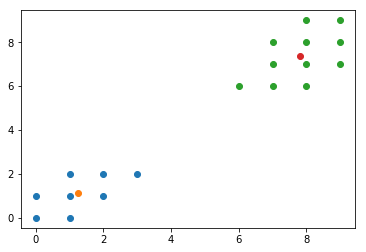

In [11]:
draw_scatters(K = 2,clusters = clusters, clusters_center = clusters_center)